In [ ]:
#4.Plot a bubble chart to analyze the relationship between app size (in MB) and average rating,
#with the bubble size representing the number of installs. 
#Include a filter to show only apps with a rating higher than 3.5 
#and that belong to the "Games" category and installs should be more than 50k 
#as well as this graph should work only between 5 PM IST to 7 PM IST apart from that time we should not show this graph in dashboard itself.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime


In [2]:
play_store_data = pd.read_csv('Play Store Data.csv')


In [3]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))  
    elif 'k' in size:
        return float(size.replace('k', '')) 
    else:
        return np.nan 
play_store_data['Size'] = play_store_data['Size'].astype(str).apply(convert_size)


In [4]:
# Remove non-numeric values like "Free"
play_store_data = play_store_data[~play_store_data['Installs'].str.contains('Free', na=False)]

# Convert 'Installs' column to numeric
play_store_data['Installs'] = play_store_data['Installs'].str.replace('[+,]', '', regex=True).astype(float)


In [9]:
filtered_data = play_store_data[
    (play_store_data['Category'] == 'GAME') &  
    (play_store_data['Rating'] > 3.5) &        
    (play_store_data['Installs'] > 50000)      
]
print(filtered_data)

                                App Category  Rating   Reviews  Size  \
1653                         ROBLOX     GAME     4.5   4447388  67.0   
1654                 Subway Surfers     GAME     4.5  27722264  76.0   
1655               Candy Crush Saga     GAME     4.4  22426677  74.0   
1656                      Solitaire     GAME     4.7    254258  23.0   
1657                 Bubble Shooter     GAME     4.5    148897  46.0   
...                             ...      ...     ...       ...   ...   
10784                    Big Hunter     GAME     4.3    245455  84.0   
10792        Soccer Clubs Logo Quiz     GAME     4.2     21661  16.0   
10793                     Sid Story     GAME     4.4     28510  78.0   
10803  Fatal Raid - No.1 Mobile FPS     GAME     4.3     56496  81.0   
10804                  Poker Pro.Fr     GAME     4.2      5442  17.0   

           Installs  Type Price Content Rating                        Genres  \
1653   1.000000e+08  Free     0   Everyone 10+  Adventu

In [6]:
allowed_hours = (17, 19)
current_time_utc = datetime.datetime.utcnow()
current_time_ist = current_time_utc + datetime.timedelta(hours=5, minutes=30)


In [7]:
if allowed_hours[0] <= current_time_ist.hour < allowed_hours[1]:
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_data['Size'], filtered_data['Rating'],
                s=filtered_data['Installs'] / 10000, alpha=0.5, c='blue', edgecolors='black')

    plt.xlabel('App Size (MB)')
    plt.ylabel('Average Rating')
    plt.title('Bubble Chart: App Size vs Rating (Games)')
    plt.grid(True)
    plt.show()
else:
    print("The graph is only available between 5 PM IST and 7 PM IST.")


The graph is only available between 5 PM IST and 7 PM IST.


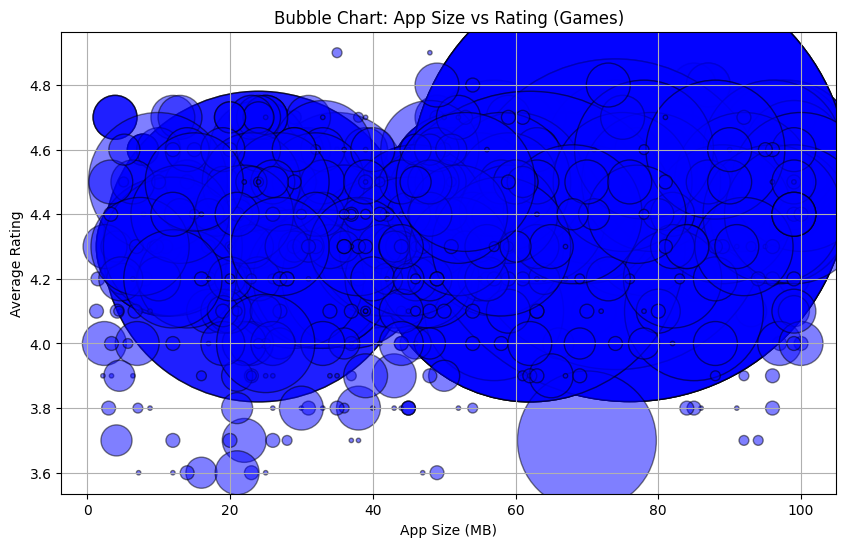

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Size'], filtered_data['Rating'],
            s=filtered_data['Installs'] / 10000, alpha=0.5, c='blue', edgecolors='black')

plt.xlabel('App Size (MB)')
plt.ylabel('Average Rating')
plt.title('Bubble Chart: App Size vs Rating (Games)')
plt.grid(True)
plt.show()
